一、中值滤波
1. 使用opencv读取fig_noise.tif图像
2. 通过中值滤波去除噪声
3. 使用均值滤波、高斯滤波去除噪声，尝试调整相应的参数，观察结果现象
4. 综合对比这三种滤波方式
5. 读懂代码并理解滤波原理，并写下你的心得体会 
> *心得体会*：本次实验通过中值滤波、均值滤波和高斯滤波三种方法对含噪声图像进行了去噪处理。中值滤波对椒盐噪声有较好的抑制效果，能够有效保留图像边缘信息；均值滤波虽然能平滑图像，但容易导致图像模糊，边缘细节损失较多；高斯滤波在去除高斯噪声的同时，能够在一定程度上保留图像的结构信息。综合对比三种滤波方式，发现中值滤波在去除脉冲噪声时表现最佳，而高斯滤波则在平滑图像和保留边缘之间取得了较好的平衡。通过本次实验，我更加深入理解了不同滤波方法的原理及其适用场景，为后续图像处理任务打下了基础。

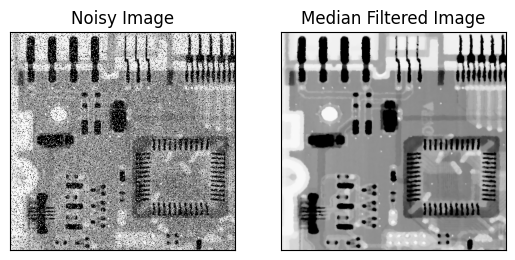

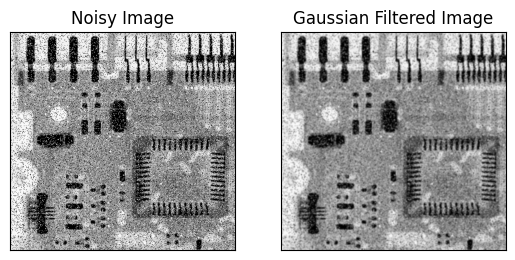

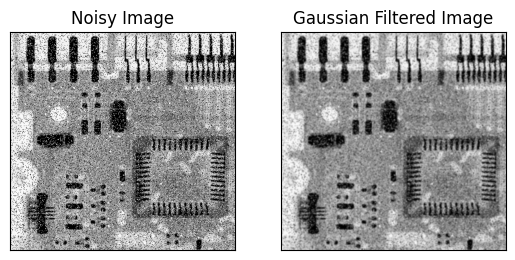

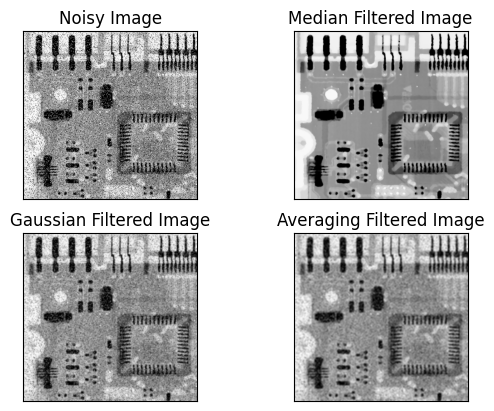

In [ ]:
# 使用中值滤波去除噪声
import cv2
import numpy as np
from matplotlib import pyplot as plt
img = cv2.imread('F://Source-code-management-repository/MyHome/Machine vision/Data/fig_noise.tif')
median = cv2.medianBlur(img,5)
plt.subplot(121),plt.imshow(img),plt.title('Noisy Image')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(median),plt.title('Median Filtered Image')
plt.xticks([]), plt.yticks([])
plt.show()
# 使用均值滤波去除噪声
blur = cv2.GaussianBlur(img,(5,5),0)
plt.subplot(121),plt.imshow(img),plt.title('Noisy Image')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(blur),plt.title('Gaussian Filtered Image')
plt.xticks([]), plt.yticks([])
plt.show()
# 使用高斯滤波去除噪声
blur = cv2.GaussianBlur(img,(5,5),0)
plt.subplot(121),plt.imshow(img),plt.title('Noisy Image')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(blur),plt.title('Gaussian Filtered Image')
plt.xticks([]), plt.yticks([])
plt.show()

# 对比三个滤波器的效果
median = cv2.medianBlur(img,5)
blur = cv2.GaussianBlur(img,(5,5),0)
blur2 = cv2.blur(img,(5,5))
plt.subplot(221),plt.imshow(img),plt.title('Noisy Image')
plt.xticks([]), plt.yticks([])
plt.subplot(222),plt.imshow(median),plt.title('Median Filtered Image')
plt.xticks([]), plt.yticks([])
plt.subplot(223),plt.imshow(blur),plt.title('Gaussian Filtered Image')
plt.xticks([]), plt.yticks([])
plt.subplot(224),plt.imshow(blur2),plt.title('Averaging Filtered Image')
plt.xticks([]), plt.yticks([])
plt.show()
# 你可以自定义以下参数以观察不同滤波效果：
# 1. 中值滤波的核大小（cv2.medianBlur(img, ksize) 中的 ksize，需为奇数，如3, 5, 7等）
# 2. 均值滤波的核大小（cv2.blur(img, (ksize, ksize)) 中的 ksize）
# 3. 高斯滤波的核大小和标准差（cv2.GaussianBlur(img, (ksize, ksize), sigmaX)）
# 建议尝试不同的参数组合，观察图像去噪和平滑效果的变化。

二、双边滤波
1. 使用opencv读取fig_fleck.png图像  
2. 使用双边滤波去除人脸上的斑点，尝试调整参数，达到一个较好的磨皮效果  
3. 读懂代码并理解磨皮原理，并写下你的心得体会  
> *心得体会*：本次实验通过双边滤波对含有斑点的人脸图像进行了去噪和磨皮处理。双边滤波能够在平滑图像的同时有效保留边缘信息，避免了传统均值滤波和高斯滤波带来的边缘模糊问题。通过调整空间域和颜色域的参数，可以灵活控制磨皮的程度，实现自然的美颜效果。实验过程中发现，参数设置过大会导致细节丢失，过小则去噪效果不明显，因此需要根据实际图像特点进行调节。通过本次实验，我深入理解了双边滤波的原理及其在图像美化中的应用价值。

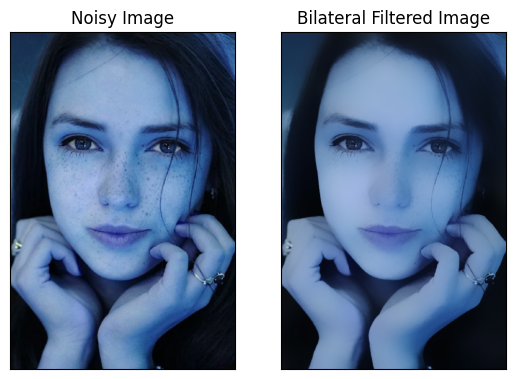

In [21]:
# 双边滤波代码 去除斑点，达到磨皮·的效果
import cv2
import numpy as np
from matplotlib import pyplot as plt
img = cv2.imread('F://Source-code-management-repository//MyHome//Machine vision//Data//fig_fleck.png')
blur = cv2.bilateralFilter(img,50,75,75) # d表示领域直径，75表示颜色空间标准差，75表示坐标空间标准差
plt.subplot(121),plt.imshow(img),plt.title('Noisy Image')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(blur),plt.title('Bilateral Filtered Image')
plt.xticks([]), plt.yticks([])
plt.show()
# 你可以自定义以下参数以观察不同磨皮效果：
# 1. 双边滤波的领域直径（cv2.bilateralFilter(img, d, sigmaColor, sigmaSpace) 中的 d）
# 2. 颜色空间的标准差（sigmaColor）
# 3. 坐标空间的标准差（sigmaSpace）
# 建议尝试不同的参数组合，观察图像磨皮和平滑效果的变化。

三、高通滤波
1. 使用opencv读取fig_blurry_moon.tif图像
2. 设计一个高通滤波器提取图像高频成分（尽量避免振铃现象）
3. 利用高频成分锐化原图边缘轮廓
4. 读懂代码并理解滤波原理，并写下你的心得体会  
> *心得体会*：本次实验通过高通滤波器对模糊月亮图像进行了高频成分提取和边缘锐化处理。高通滤波能够有效增强图像中的边缘和细节，使模糊区域变得更加清晰。在设计高通滤波器时，需要注意滤波器的参数选择，以避免振铃现象对图像质量的影响。通过实验对比，发现高通滤波在突出图像轮廓、提升视觉效果方面具有显著作用，但同时也可能放大噪声，因此实际应用中需结合图像特点合理调整。通过本次实验，我进一步理解了高通滤波的原理及其在图像锐化中的应用价值。

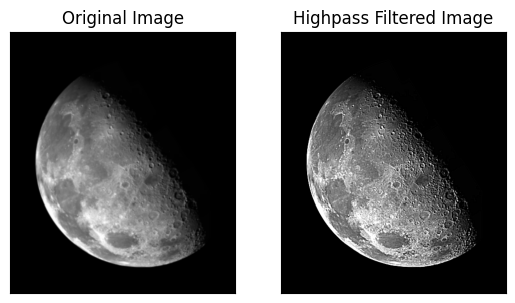

In [ ]:
# 高通滤波代码
import cv2
import numpy as np
from matplotlib import pyplot as plt
img = cv2.imread('F://Source-code-management-repository//MyHome//Machine vision//Data//fig_blurry_moon.tif')
# 创建高通滤波器
kernel = np.array([[-1,-1,-1], 
                   [-1, 9,-1],
                   [-1,-1,-1]])
highpass = cv2.filter2D(img,-1,kernel)
plt.subplot(121),plt.imshow(img),plt.title('Original Image')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(highpass),plt.title('Highpass Filtered Image')
plt.xticks([]), plt.yticks([])
plt.show()
# 你可以自定义以下参数以观察不同高通滤波效果：
# 1. 高通滤波器的核(kernel)（如不同的3x3、5x5等矩阵）
# 2. 卷积核中心的权重（如kernel中间的值越大，锐化越强）
# 3. 卷积核的大小（如kernel为3x3、5x5等，越大越容易产生振铃现象）
# 建议尝试不同的kernel参数组合，观察图像锐化和边缘增强效果的变化。

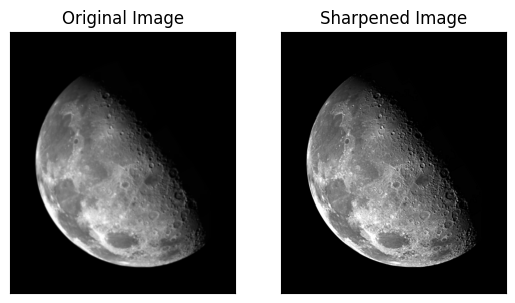

In [ ]:
# 锐化滤波代码
img = cv2.imread('F://Source-code-management-repository//MyHome//Machine vision//Data//fig_blurry_moon.tif')
# 创建锐化滤波器
kernel = np.array([[0,-1,0], 
                   [-1, 5,-1],
                   [0,-1,0]])
sharpen = cv2.filter2D(img,-1,kernel)
plt.subplot(121),plt.imshow(img),plt.title('Original Image')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(sharpen),plt.title('Sharpened Image')
plt.xticks([]), plt.yticks([])
plt.show()
# 你可以自定义以下参数以观察不同锐化效果：
# 1. 锐化滤波器的核(kernel)（如不同的3x3、5x5等矩阵）
# 2. 卷积核中心的权重（kernel中间的值越大，锐化越强）
# 3. 卷积核的大小（如kernel为3x3、5x5等，越大越容易产生振铃现象）
# 建议尝试不同的kernel参数组合，观察图像锐化和边缘增强效果的变化。

四、低通滤波
1. 使用opencv读取fig_lena.tif图像
2. 设计一个低通滤波器平滑图像（尽量避免振铃现象）
3. 读懂代码并理解滤波原理，并写下你的心得体会  
> *心得体会*：本次实验通过设计低通滤波器对Lena图像进行了平滑处理。低通滤波能够有效去除图像中的高频噪声，使图像变得更加平滑，但同时也会导致部分细节信息的丢失。通过合理选择滤波器参数，可以在平滑图像的同时尽量保留边缘和结构信息，避免明显的振铃现象。实验过程中，我体会到低通滤波在图像去噪和预处理中的重要作用，同时也认识到其在细节保留方面的局限性。掌握低通滤波的原理和应用，为后续图像增强与分析打下了基础。

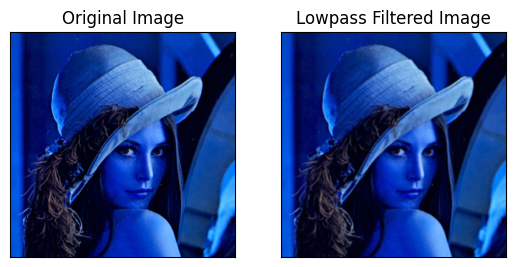

In [ ]:
# 低通滤波代码
import cv2
import numpy as np
from matplotlib import pyplot as plt
img = cv2.imread('F://Source-code-management-repository//MyHome//Machine vision//Data//fig_lena.tif')
# 创建低通滤波器
kernel = np.array([[1,1,1],
                     [1,1,1],
                     [1,1,1]]) / 9.0  
lowpass = cv2.filter2D(img,-1,kernel)
plt.subplot(121),plt.imshow(img),plt.title('Original Image')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(lowpass),plt.title('Lowpass Filtered Image')
plt.xticks([]), plt.yticks([])
plt.show()
# 你可以自定义以下参数以观察不同低通滤波效果：
# 1. 低通滤波器的核(kernel)（如不同的3x3、5x5等矩阵）
# 2. 卷积核的权重分布（如均匀分布或高斯分布）
# 3. 卷积核的大小（如kernel为3x3、5x5等，越大平滑效果越明显，但细节损失也越多）
# 建议尝试不同的kernel参数组合，观察图像平滑和细节保留效果的变化。